Средняя пенсия: 13197.90909090909


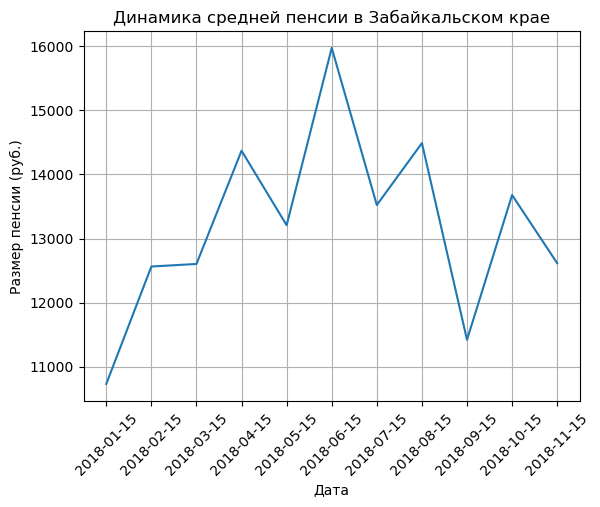

In [1]:
#76

import requests
import matplotlib.pyplot as plt
# %matplotlib inline

data_url = 'https://raw.githubusercontent.com/dm-fedorov/python_basic/master/data/opendata.stat' 

try:
    response = requests.get(data_url)
    data = response.text 

except requests.exceptions.RequestException as e:
    print(f"Ошибка при выполнении запроса: {e}")

clean_data = [list(map(str, i.split(','))) for i in data.split('\n') if i]
pens_data = [i for i in clean_data if i[1] == 'Забайкальский край' and i[0] == 'Средняя пенсия' and i[2][:4] == '2018']
result = sum(int(i[3]) for i in pens_data) / len(pens_data)

y_coords = [int(i[3]) for i in pens_data]
x_coords = [i[2] for i in pens_data]

print(f"Средняя пенсия: {result}")

plt.plot(x_coords, y_coords)

plt.title('Динамика средней пенсии в Забайкальском крае')
plt.xlabel('Дата')
plt.ylabel('Размер пенсии (руб.)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()